In [4]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [5]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

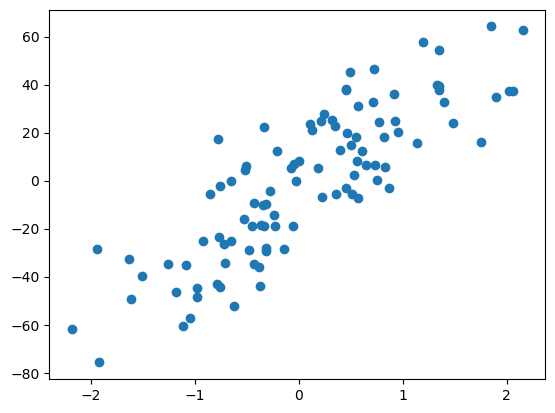

In [6]:
plt.scatter(X,y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [9]:
lr.coef_

array([27.82809103])

In [10]:
lr.intercept_

-2.29474455867698

In [11]:
np.mean(cross_val_score(lr,X,y,cv=10,scoring='r2'))

0.6375011587464419

In [12]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self,X,y):
        # calcuate the b using GD

        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.m = self.m - (self.learning_rate * loss_slope_m)
            self.b = self.b - (self.learning_rate * loss_slope_b)
        # print(self.m, self.b)
    
    def predict(self,X_test):
        return self.m*X_test + self.b

In [13]:
customgd = GDRegressor(0.001,50)


In [14]:

customgd.fit(X,y)

In [15]:
y_pred = customgd.predict(X)

In [16]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.7035181505052002

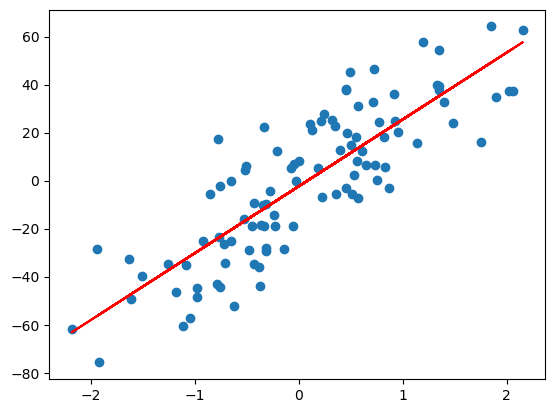

In [17]:
plt.scatter(X,y)
plt.plot(X,customgd.m*X + customgd.b,color='red')
plt.show()